# <연애 상담 챗봇 만들기>

## 0. 데이터 확인/저장

### 1) 원본 감성 대화 데이터(10만개) -> 청년, 연애/결혼/출산 데이터로 전처리

In [31]:
import pandas as pd

# 감성 대화 데이터 (5만개)
data = pd.read_excel('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/origin_data/감성대화_원본_10만개.xlsx',header=0)
data

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?
1,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?
2,11,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?
3,23,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.
4,24,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?
...,...,...,...,...,...,...,...,...,...
116537,116477,청년,남성,"연애,결혼,출산",해당없음,슬픔,환멸을 느끼는,조건을 다 맞춘 상태에서 결혼하기를 바라시는데 현실은 그렇지 않으니 양쪽 서로 힘이...,현실적인 문제로 결혼이 어려우시군요.
116538,116495,청년,여성,대인관계,해당없음,슬픔,눈물이 나는,아무래도 다들 일을 하게 되면서 예전보다 연락 빈도가 줄어들어서 그런 것 같아.,연락 빈도가 줄어들어 친구들과 멀어지는 느낌이 드셨군요.
116539,116507,청년,여성,대인관계,해당없음,슬픔,슬픔,누구나 한번은 죽는 게 당연한 건데 막상 그럴 일이 닥친다고 생각하니 슬퍼.,이럴 때 어떻게 하면 기분이 조금 나아질 수 있을까요?
116540,116509,청년,여성,대인관계,해당없음,슬픔,실망한,너무 속상하고 동료에게 실망스러웠어.,동료에게 험담을 들어 속상하고 동료에게 실망하셨군요.


In [32]:
data = data[data['연령']=='청년']
data.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?
1,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?
2,11,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?
3,23,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.
4,24,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32810 entries, 0 to 116541
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  32810 non-null  int64 
 1   연령          32810 non-null  object
 2   성별          32810 non-null  object
 3   상황키워드       32810 non-null  object
 4   신체질환        32810 non-null  object
 5   감정_대분류      32810 non-null  object
 6   감정_소분류      32810 non-null  object
 7   사람문장1       32810 non-null  object
 8   시스템문장1      32810 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


In [34]:
data = data[data['상황키워드']=='연애,결혼,출산']
data.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
15,101,청년,남성,"연애,결혼,출산",해당없음,기쁨,기쁨,결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
16,112,청년,남성,"연애,결혼,출산",해당없음,기쁨,흥분,그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
18,115,청년,남성,"연애,결혼,출산",해당없음,기쁨,안도,나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
28,152,청년,남성,"연애,결혼,출산",해당없음,기쁨,안도,내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
29,153,청년,남성,"연애,결혼,출산",해당없음,기쁨,자신하는,내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8922 entries, 15 to 116537
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8922 non-null   int64 
 1   연령          8922 non-null   object
 2   성별          8922 non-null   object
 3   상황키워드       8922 non-null   object
 4   신체질환        8922 non-null   object
 5   감정_대분류      8922 non-null   object
 6   감정_소분류      8922 non-null   object
 7   사람문장1       8922 non-null   object
 8   시스템문장1      8922 non-null   object
dtypes: int64(1), object(8)
memory usage: 697.0+ KB


In [36]:
data = data[['연령','상황키워드','사람문장1','시스템문장1']]
data.head()

,연령,상황키워드,사람문장1,시스템문장1
15,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
16,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
18,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
28,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
29,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [37]:
data = data.reset_index()
data.head()

,index,연령,상황키워드,사람문장1,시스템문장1
0,15,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
1,16,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
2,18,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
3,28,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
4,29,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [38]:
data = data[['연령','상황키워드','사람문장1','시스템문장1']]
data.head()

,연령,상황키워드,사람문장1,시스템문장1
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [39]:
data = data.rename(columns={'연령':'age'})
data = data.rename(columns={'상황키워드':'subject'})
data = data.rename(columns={'사람문장1':'input'})
data = data.rename(columns={'시스템문장1':'output'})
data.head()

,age,subject,input,output
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [41]:
data.to_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/preprocess_data/감성대화_청년_연결출_9000개',index=False)

## 1. 저장된 단어 사전 위치

In [ ]:
# '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/chatbot_dict/chatbot_dict.bin'

# 2. 핵심 단어 길이 구하기 (MAX_LEN) == 25로 하면 됌

In [42]:
# !pip install konlpy
from konlpy.tag import Komoran
tokenizer = Komoran()
data = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/preprocess_data/감성대화_청년_연결출_9000개')

In [43]:
data.head()

,age,subject,input,output
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [44]:
# data의 모든 사용자 input문장을 형태소/품사로 분해하여 리스트에 저장

input_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(input)] for input in  data['input']]

In [45]:
len(input_tokenized)

8922

In [49]:
input_tokenized[5]

['내/NP',
 '가/JKS',
 '좋아하/VV',
 '는/ETM',
 '사람/NNG',
 '이/JKS',
 '있/VV',
 '는데/EC',
 '오늘/NNG',
 '고백/NNG',
 '을/JKO',
 '하/VV',
 'ㄹ/ETM',
 '거/NNB',
 '야/JKV',
 './SF',
 '그런데/MAJ',
 '왠지/MAG',
 '느낌이 좋아/NNP',
 './SF']

In [50]:
exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

core_input_tokenized = []

# i는 문장의 갯수
for i in range(len(input_tokenized)):
        temp = []
        # data_tokenized[0]=> 한 문장
        # j는 한 문장을 구성하는 '단어/품사' 갯수
        for j in range(len(input_tokenized[i])):
            # f에 품사를 넣음
            # exclusion_tags 리스트에 포함되지 않는 품사면 append!
            # 필요없는 품사가 아니면 append
            # (조사 같은 것들은 제외!)
            if f(input_tokenized[i][j].split('/')[1]) is False:
                temp.append(input_tokenized[i][j].split('/')[0])
        core_input_tokenized.append(temp)

In [51]:
input_tokenized[33] , core_input_tokenized[33]

(['결혼/NNG',
  '은/JX',
  '꼭/MAG',
  '하/VV',
  '아야/EC',
  '되/VV',
  '는/ETM',
  '걸/VV',
  'ㄹ까/EF',
  '?/SF'],
 ['결혼', '꼭', '하', '되', '걸'])

토큰 길이 평균: 9.995292535305985
토큰 길이 최대: 31
토큰 길이 표준편차: 3.787238364886527


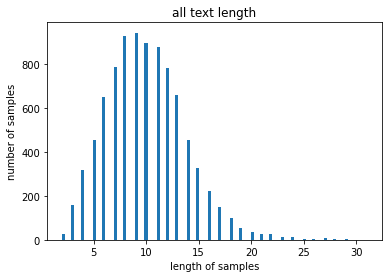

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 불용어들을 제외한 '의미있는' 단어들의 길이들을 모아놓은 num_tokens
num_tokens = [len(tokens) for tokens in core_input_tokenized]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

plt.title('all text length')
plt.hist(num_tokens, bins=100)
# bins는 가로축 구간의 개수
# (막대 그래프의 갯수)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
select_length = 25


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# core_input_tokenized에는 전체 문장 데이터들을 token화 시킨 뒤,
# 의미있는 단어들의 품사들만 필터링한 (불용어 처리한) 단어들의 집함임!    
below_threshold_len(select_length, core_input_tokenized)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9976462676529926


# 3. PADDING 처리

In [59]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
import pickle

class Preprocess:
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/chatbot_dict/chatbot_dict.bin' ,userdic=None): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/chatbot_dict/chatbot_dict.bin',
               userdic=None)

단어 사전 로드 완료..


In [56]:
inputs = data['input'].tolist()

In [57]:
inputs[0]

'결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.'

In [60]:
!pip install tqdm
from tqdm import tqdm

sequences = []
check_keywords = True
# text는 모든 문장들의 list
for sentence in tqdm(inputs):

    # 문장을 [(단어1,품사1),(단어2,품사2)...] 로 변환
    pos = p.pos(sentence)

    # get_keywords(pos, without_tag=True) => 불용어 처리 후 품사(태그)없이 단어들만의 list
    # keywords : 불용어 처리된 [(단어1,품사1),(단어2,품사2)...], list형
    keywords = p.get_keywords(pos, without_tag=True)

    # 첫번째 keywords 와 sequence[0] 어떻게 대응되는지 체크해보고 싶음
    if check_keywords is True:
      print(keywords)
      check_keywords = False
    # 태그없이 '단어'만 있는 keywords에서 [[단어1,단어2],[단어1,단어2,단어3]...]들을 인덱싱해줌
    # 우리가 만든 단어사전에 없으면(OOV token이므로 인덱스 1로 고정)
    seq = p.get_wordidx_sequence(keywords)
    sequences.append(seq)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/8922 [00:00<?, ?it/s]

['결혼', '지', '삼', '년', '만', '아이', '낳', '진짜', '기쁘']


100%|██████████| 8922/8922 [00:08<00:00, 1106.06it/s]


In [61]:
sequences[0]

[259, 22, 900, 141, 56, 337, 991, 59, 753]

In [62]:
MAX_SEQ_LEN = 25
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [63]:
len(padded_seqs[33]) ,len(padded_seqs[333]),len(padded_seqs[3333])

(25, 25, 25)

In [64]:
padded_seqs[333] ,padded_seqs[3333],padded_seqs[3333]

(array([ 14,  95, 318, 389,  54,  61,  49,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32),
 array([2233,  451, 5811,  553,   14, 2075,   20,  100,  292,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32),
 array([2233,  451, 5811,  553,   14, 2075,   20,  100,  292,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32))

# 4. SBERT 활용 embedding_data 만들기



In [68]:
# KR-SBERT 설치
# !pip install -U sentence-transformers
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import torch
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [67]:
data = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/preprocess_data/감성대화_청년_연결출_9000개')
data.head()

,age,subject,input,output
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?


In [69]:
data['embedding_vector'] = data['input'].progress_map(lambda x : model.encode(x))
data.head()

100%|██████████| 8922/8922 [02:24<00:00, 61.55it/s]


,age,subject,input,output,embedding_vector
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?,"[-0.46997854, -0.7550493, -1.0217191, -0.33366..."
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?,"[-0.3430577, -0.5928144, -1.3499519, 0.5170767..."
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?,"[-0.42469263, -0.42966777, -0.40348637, -0.557..."
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?,"[-0.019743085, -0.8885102, -0.70748657, -0.023..."
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?,"[-0.46378723, -0.055747643, -1.1302817, 0.0048..."


In [70]:
data.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/embedding_data/love_embedding.xlsx", index=False)
data.head()

,age,subject,input,output,embedding_vector
0,청년,"연애,결혼,출산",결혼한 지 삼 년 만에 아이를 낳았어. 진짜 기뻐.,간절히 바라던 아이를 출산하셔서 기쁘시군요. 지금 바라는 것이 있으신가요?,"[-0.46997854, -0.7550493, -1.0217191, -0.33366..."
1,청년,"연애,결혼,출산",그녀가 나에게 사귀자고 고백했어. 나도 원하고 있었는데 지금 기분이 너무 좋아.,그녀의 고백에 흥분한 모습이네요. 이제 여자친구와 어떻게 진행하실 생각이세요?,"[-0.3430577, -0.5928144, -1.3499519, 0.5170767..."
2,청년,"연애,결혼,출산",나 그래도 다행인 부분이 첫 연애를 좋게 시작해서 좋은 것 같아.,그거 다행이네요. 연애에 만족하고 계시나요?,"[-0.42469263, -0.42966777, -0.40348637, -0.557..."
3,청년,"연애,결혼,출산",내 여자친구가 바람이 난 것 같아서 의심했어.,그래서 어떻게 하셨나요?,"[-0.019743085, -0.8885102, -0.70748657, -0.023..."
4,청년,"연애,결혼,출산",내 여자친구가 프러포즈를 받아줄 것 같은 확신이 들어.,프러포즈 성공에 자신감이 있으시군요. 어떤 점에서 확신이 들었나요?,"[-0.46378723, -0.055747643, -1.1302817, 0.0048..."


In [71]:
love_embedding_data = torch.tensor(data['embedding_vector'].tolist())
data.info(), len(love_embedding_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               8922 non-null   object
 1   subject           8922 non-null   object
 2   input             8922 non-null   object
 3   output            8922 non-null   object
 4   embedding_vector  8922 non-null   object
dtypes: object(5)
memory usage: 348.6+ KB


<ipython-input-71-a7f3ae42cde8>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  love_embedding_data = torch.tensor(data['embedding_vector'].tolist())


(None, 8922)

In [72]:
torch.save(love_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/embedding_data/love_embedding_data.pt')

# 5. 연애 상담 챗봇 사용!

In [ ]:
# util.cos_sim 연습

s1 = '점점 잠이 옵니다.'
s2 = '점점 잠이 옵니다.'
s3 = '점점 잠에 듭니다.'

sentence1 = s1.replace(" ","")
sentence_encode1 = model.encode(sentence1)
sentence_tensor1 = torch.tensor(sentence_encode1)

sentence2 = s2.replace(" ","")
sentence_encode2 = model.encode(sentence2)
sentence_tensor2 = torch.tensor(sentence_encode2)

sentence3 = s3.replace(" ","")
sentence_encode3 = model.encode(sentence3)
sentence_tensor3 = torch.tensor(sentence_encode3)

# sentence_tensor4 = torch.tensor(sentence_tensor2+sentence_tensor3)

test_cos_sim1 = util.cos_sim(sentence_tensor1, sentence_tensor2)
test_cos_sim2 = util.cos_sim(sentence_tensor2, sentence_tensor3)
# test_cos_sim3 = util.cos_sim(sentence_tensor1, sentence_tensor4)

test_cos_sim1 , test_cos_sim2 

In [73]:
# !pip install sentence_transformers

import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# SBERT 모델 불러오기
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

# 학습된 input, output df 불러오기
data = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/preprocess_data/감성대화_청년_연결출_9000개')
data = data[['input','output']]

# input별 embedding data 불러오기
embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/love_chatbot_sbert_v1/data/embedding_data/love_embedding_data.pt')

In [207]:
last_sentence = ''
last_sim_idx_list = []
overlap_cnt = 0

def talk_to_bot(sentence):

  global last_sentence 
  global last_sim_idx_list
  global overlap_cnt

  overlap_thresholds = 0.85
  remove_sim_idx = None

  sentence = sentence.replace(" ","")
  sentence_encode = model.encode(sentence)
  sentence_tensor = torch.tensor(sentence_encode)

  last_sentence = last_sentence.replace(" ","")
  last_sentence_encode = model.encode(last_sentence)
  last_sentence_tensor = torch.tensor(last_sentence_encode)

  overlap_cos_sim = util.cos_sim(sentence_tensor, last_sentence_tensor)

  cos_sim = util.cos_sim(sentence_tensor, embedding_data)

  # 이전 질문과 문장이 0.85이상 유사하면 
  # 해당 질문-답변 출력 X
  # 총 3번까지

  if overlap_cos_sim >= overlap_thresholds and overlap_cnt < 3 :
    print('************************ 이전 질문과 유사함 ************************')
    remove_sim_idx_list = last_sim_idx_list

    for i in remove_sim_idx_list:
      cos_sim[0][int(i)] = 0
    overlap_cnt += 1
    print(f'이전 출력 idx: {last_sim_idx_list}')
    print(f'이전 질문과 유사도: {overlap_cos_sim}')
    print(f'중복횟수 : {overlap_cnt}')
  else:
    overlap_cnt = 0
    last_sim_idx_list = []

  print(f'사용자의 질문: {sentence} \n')

  dot_score = util.dot_score(sentence_tensor, embedding_data)
  ascending_cos_sim = np.sort(cos_sim)
  descending_cos_sim = ascending_cos_sim[::-1]
  # print(f'cos_sim 유사도 내림차순: {ascending_cos_sim}')

  print(f'--------------------------- 최우선 순위 질문/답변 ---------------------------')
  print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

  # data에서 선택된 질문 출력
  best_sim_idx = int(np.argmax(cos_sim))
  sentence_qes = data['input'][best_sim_idx]
  print(f"선택된 질문 = {sentence_qes}")

  # data에서 선택된 질문 문장에 대한 인코딩
  selected_qes_encode = model.encode(sentence_qes)

  # 유사도 점수 측정
  # print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, sentence_encode)}')
  # print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
  # print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
  print(f'util.cos_sim 활용 코사인 유사도 : {cos_sim[0][best_sim_idx]}')
  score = np.dot(sentence_tensor, sentence_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
  print(f"직접 수식 작성한 코사인 유사도 = {score}")

  # 답변
  answer = data['output'][best_sim_idx]
  print(f"\n답변 : {answer}\n")

  # 중복 input 대응을 위해 이전 idx,sentence 저장 
  last_sim_idx_list.append(int(np.argmax(cos_sim)))
  last_sentence = sentence

  # 최우선 순위 질문 벡터 초기화 
  cos_sim[0][best_sim_idx] = 0

  print(f'--------------------------- 후순위 답변/질문 디버깅 ---------------------------')
  for i in range(1,6):
    print(f'<{i}순위 Case>')
    print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

    # data에서 선택된 질문 출력
    best_sim_idx = int(np.argmax(cos_sim))
    sentence_qes = data['input'][best_sim_idx]
    print(f"선택된 질문 = {sentence_qes}")

    # data에서 선택된 질문 문장에 대한 인코딩
    selected_qes_encode = model.encode(sentence_qes)

    # 유사도 점수 측정
    # print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, sentence_encode)}')
    # print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
    # print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
    print(f'util.cos_sim 활용 코사인 유사도 : {cos_sim[0][best_sim_idx]}')
    score = np.dot(sentence_tensor, sentence_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
    print(f"직접 수식 작성한 코사인 유사도 = {score}")

    # 답변
    answer = data['output'][best_sim_idx]
    print(f"\n답변 : {answer}\n")

    # 최우선 순위 질문 벡터 초기화 
    cos_sim[0][best_sim_idx] = 0

  print(f'-------------------------------------------------------------------------------')

  return last_sentence, last_sim_idx_list , overlap_cnt

In [208]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 5836
선택된 질문 = 내가 결혼을 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7626184821128845
직접 수식 작성한 코사인 유사도 = 0.9475586414337158

답변 : 결혼에 대해서 생각이 많으신 것 같네요. 무슨 일인지 제가 들어볼 수 있을까요?

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 8807
선택된 질문 = 난 과연 앞으로 결혼 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7526491284370422
직접 수식 작성한 코사인 유사도 = 0.9317430853843689

답변 : 결혼을 할 수 있을지 걱정이 되시는군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<4순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 

In [209]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [5836]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 1
사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 8807
선택된 질문 = 난 과연 앞으로 결혼 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7526491284370422
직접 수식 작성한 코사인 유사도 = 0.9317430853843689

답변 : 결혼을 할 수 있을지 걱정이 되시는군요.

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 유사도 = 0.9685928225517273

답변 : 걱정되는 부분이 무엇인가요?

<4순위 Case>
가장 높은 코사인 유사도 idx : 448

In [210]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [5836, 8807]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 2
사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 유사도 = 0.9685928225517273

답변 : 걱정되는 부분이 무엇인가요?

<3순위 Case>
가장 높은 코사인 유사도 idx : 4487
선택된 질문 = 과연 내가 결혼을 할 수 있을까? 나이가 이젠 너무 많아.
util.cos_sim 활용 코사인 유사도 : 0.6971834301948547
직접 수식 작성한 코사인 유사도 = 1.0229625701904297

답변 : 나이가 많아 결혼을 할 수 있을지 걱정되시는군요.

<4순위 Case>


In [211]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [5836, 8807, 7426]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 3
사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 유사도 = 0.9685928225517273

답변 : 걱정되는 부분이 무엇인가요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 4487
선택된 질문 = 과연 내가 결혼을 할 수 있을까? 나이가 이젠 너무 많아.
util.cos_sim 활용 코사인 유사도 : 0.6971834301948547
직접 수식 작성한 코사인 유사도 = 1.0229625701904297

답변 : 나이가 많아 결혼을 할 수 있을지 걱정되시는군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 4262
선택된 질문 = 이 나이에 결혼하는 게 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.6806581020355225
직접 수식 작성한 코사인 유사도 = 0.9723232388496399

답변 : 결혼에 대해 걱정되는 것이 있나요?

<

In [212]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 5836
선택된 질문 = 내가 결혼을 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7626184821128845
직접 수식 작성한 코사인 유사도 = 0.9475586414337158

답변 : 결혼에 대해서 생각이 많으신 것 같네요. 무슨 일인지 제가 들어볼 수 있을까요?

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 8807
선택된 질문 = 난 과연 앞으로 결혼 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7526491284370422
직접 수식 작성한 코사인 유사도 = 0.9317430853843689

답변 : 결혼을 할 수 있을지 걱정이 되시는군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<4순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 

In [213]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [5836]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 1
사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 8807
선택된 질문 = 난 과연 앞으로 결혼 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7526491284370422
직접 수식 작성한 코사인 유사도 = 0.9317430853843689

답변 : 결혼을 할 수 있을지 걱정이 되시는군요.

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 유사도 = 0.9685928225517273

답변 : 걱정되는 부분이 무엇인가요?

<4순위 Case>
가장 높은 코사인 유사도 idx : 448

In [214]:
last_sentence, last_sim_idx_list , overlap_cnt = talk_to_bot('내가 미래에 결혼할 수 있을까?')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [5836, 8807]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 2
사용자의 질문: 내가미래에결혼할수있을까? 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 7426
선택된 질문 = 나 과연 결혼은 할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7353235483169556
직접 수식 작성한 코사인 유사도 = 0.9603838920593262

답변 : 결혼에 대해서 고민이시군요.

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 4870
선택된 질문 = 과연 지금 결혼하는 것이 맞을까?
util.cos_sim 활용 코사인 유사도 : 0.7037502527236938
직접 수식 작성한 코사인 유사도 = 0.9708771705627441

답변 : 결혼을 언제 할까 생각하고 계시군요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 5121
선택된 질문 = 내가 결혼 생활을 잘할 수 있을까?
util.cos_sim 활용 코사인 유사도 : 0.7022172808647156
직접 수식 작성한 코사인 유사도 = 0.9685928225517273

답변 : 걱정되는 부분이 무엇인가요?

<3순위 Case>
가장 높은 코사인 유사도 idx : 4487
선택된 질문 = 과연 내가 결혼을 할 수 있을까? 나이가 이젠 너무 많아.
util.cos_sim 활용 코사인 유사도 : 0.6971834301948547
직접 수식 작성한 코사인 유사도 = 1.0229625701904297

답변 : 나이가 많아 결혼을 할 수 있을지 걱정되시는군요.

<4순위 Case>


In [215]:
talk_to_bot('내 여자친구가 바람 핀건 아닌지 의심가')

사용자의 질문: 내여자친구가바람핀건아닌지의심가 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 3
선택된 질문 = 내 여자친구가 바람이 난 것 같아서 의심했어.
util.cos_sim 활용 코사인 유사도 : 0.6286460757255554
직접 수식 작성한 코사인 유사도 = 0.9382743835449219

답변 : 그래서 어떻게 하셨나요?

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 4636
선택된 질문 = 애인이 나를 두고 바람을 필까 봐 겁이 나.
util.cos_sim 활용 코사인 유사도 : 0.6231584548950195
직접 수식 작성한 코사인 유사도 = 0.9853641390800476

답변 : 애인과의 사이가 멀어지는 것 같아 불안하시군요. 조금 더 자세히 말씀해주시겠어요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 3019
선택된 질문 = 아 남자 친구가 날 두고 바람을 피웠더라?
util.cos_sim 활용 코사인 유사도 : 0.6105142831802368
직접 수식 작성한 코사인 유사도 = 0.9072747230529785

답변 : 무슨 상황인지 더 자세히 설명해 주시겠어요?

<3순위 Case>
가장 높은 코사인 유사도 idx : 473
선택된 질문 = 여자 친구가 나를 두고 바람 피웠다는 소문은 사실이 아니어서 안도했어.
util.cos_sim 활용 코사인 유사도 : 0.6070735454559326
직접 수식 작성한 코사인 유사도 = 1.154813528060913

답변 : 여자 친구가 바람 피웠다는 소문이 사실이 아니어서 다행이셨군요.

<4순위 Case>
가장 높은 코사인 유사도 idx : 5508
선택된 질문 = 원래 여자를 좋아해서 나 몰래 바람피우다 예

('내여자친구가바람핀건아닌지의심가', [3], 0)

In [216]:
talk_to_bot('내 여자친구가 바람 핀건 아닌지 의심가')

************************ 이전 질문과 유사함 ************************
이전 출력 idx: [3]
이전 질문과 유사도: tensor([[1.]])
중복횟수 : 1
사용자의 질문: 내여자친구가바람핀건아닌지의심가 

--------------------------- 최우선 순위 질문/답변 ---------------------------
가장 높은 코사인 유사도 idx : 4636
선택된 질문 = 애인이 나를 두고 바람을 필까 봐 겁이 나.
util.cos_sim 활용 코사인 유사도 : 0.6231584548950195
직접 수식 작성한 코사인 유사도 = 0.9853641390800476

답변 : 애인과의 사이가 멀어지는 것 같아 불안하시군요. 조금 더 자세히 말씀해주시겠어요?

--------------------------- 후순위 답변/질문 디버깅 ---------------------------
<1순위 Case>
가장 높은 코사인 유사도 idx : 3019
선택된 질문 = 아 남자 친구가 날 두고 바람을 피웠더라?
util.cos_sim 활용 코사인 유사도 : 0.6105142831802368
직접 수식 작성한 코사인 유사도 = 0.9072747230529785

답변 : 무슨 상황인지 더 자세히 설명해 주시겠어요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 473
선택된 질문 = 여자 친구가 나를 두고 바람 피웠다는 소문은 사실이 아니어서 안도했어.
util.cos_sim 활용 코사인 유사도 : 0.6070735454559326
직접 수식 작성한 코사인 유사도 = 1.154813528060913

답변 : 여자 친구가 바람 피웠다는 소문이 사실이 아니어서 다행이셨군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 5508
선택된 질문 = 원래 여자를 좋아해서 나 몰래 바람피우다 예전에도 걸렸거든.
util.cos_sim 활용 코사인 유사도 : 0.6047821044921875
직접 수식 

('내여자친구가바람핀건아닌지의심가', [3, 4636], 1)

In [124]:
talk_to_bot('어제 나도 아들이 생겼어')

사용자의 질문: 어제 나도 아들이 생겼어 

<1순위 Case>
가장 높은 코사인 유사도 idx : 155
선택된 질문 = 나 얼마 전에 딸아이가 태어났어.
util.cos_sim 활용 코사인 유사도 : 0.5706062912940979
직접 수식 작성한 코사인 유사도 = 1.0752317905426025

답변 : 딸아이가 태어났군요. 가정에 행복이 가득하겠어요.

<2순위 Case>
가장 높은 코사인 유사도 idx : 627
선택된 질문 = 이번에 아들을 낳았어! 내 평생 꿈이 이뤄졌어.
util.cos_sim 활용 코사인 유사도 : 0.5598428845405579
직접 수식 작성한 코사인 유사도 = 1.0195469856262207

답변 : 아들이 태어나서 기분이 엄청 좋군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 1009
선택된 질문 = 그렇지. 아들인데 나랑 안 닮고 아내랑 닮아서 기뻐.
util.cos_sim 활용 코사인 유사도 : 0.5458756685256958
직접 수식 작성한 코사인 유사도 = 1.0523908138275146

답변 : 아들 얼굴에 만족하시나 봐요. 아내는 뭐라고 하시던가요?

<4순위 Case>
가장 높은 코사인 유사도 idx : 7667
선택된 질문 = 이번에 딸이 생겼으면 싶었는데 아들을 출산하게 되어 안타까워.
util.cos_sim 활용 코사인 유사도 : 0.5110858082771301
직접 수식 작성한 코사인 유사도 = 1.0411001443862915

답변 : 딸을 더 원했기에 조금은 실망하셨겠어요. 건강한 아들을 출산하셨나요?

<5순위 Case>
가장 높은 코사인 유사도 idx : 663
선택된 질문 = 오늘 아내가 첫째 아들을 출산해서 기뻐.
util.cos_sim 활용 코사인 유사도 : 0.5006536245346069
직접 수식 작성한 코사인 유사도 = 1.0536960363388062

답변 : 정말 축하드려요. 경사스러운 날이네요.



In [128]:
talk_to_bot('오늘 오래 사귄 남자친구랑 헤어졌어')

사용자의 질문: 오늘 오래 사귄 남자친구랑 헤어졌어 

<1순위 Case>
가장 높은 코사인 유사도 idx : 231
선택된 질문 = 친구가 좋은 사람과 연애하는 거 같아 다행이야.
util.cos_sim 활용 코사인 유사도 : 0.663849413394928
직접 수식 작성한 코사인 유사도 = 0.9519266486167908

답변 : 친구분 연애로 걱정이 많으셨나 봐요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 323
선택된 질문 = 어제부터 사귀기로 한 사람 정말 착하고 자상한 것 같아.
util.cos_sim 활용 코사인 유사도 : 0.6589707732200623
직접 수식 작성한 코사인 유사도 = 0.9987070560455322

답변 : 새로 만나기 시작하신 분과 잘 맞으시다니 다행이네요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 952
선택된 질문 = 응 나한테 편안함을 주는 이 여자친구랑 오래 만나고 싶다는 생각이 들었어.
util.cos_sim 활용 코사인 유사도 : 0.6516080498695374
직접 수식 작성한 코사인 유사도 = 0.945984423160553

답변 : 여자친구와 오래 만나고 싶다는 생각이 드셨군요. 여자친구와 무엇을 할 때 편안함을 느끼시나요?

<4순위 Case>
가장 높은 코사인 유사도 idx : 515
선택된 질문 = 좋아하던 친구와 진짜 연애를 하게 되었어!
util.cos_sim 활용 코사인 유사도 : 0.6503865122795105
직접 수식 작성한 코사인 유사도 = 0.9381957054138184

답변 : 좋아하던 친구와 연애하게 된 느낌이 어떤가요?

<5순위 Case>
가장 높은 코사인 유사도 idx : 1262
선택된 질문 = 오랫동안 사귀어 봤는데 믿음직스럽거든.
util.cos_sim 활용 코사인 유사도 : 0.6496392488479614
직접 수식 작성한 코사인 유사도 = 0.98054438829422

답변 : 신뢰하는 마음이 생겼나 보군요.



In [149]:
talk_to_bot('오늘 남자친구랑 헤어졌어')

사용자의 질문: 오늘 남자친구랑 헤어졌어 

<1순위 Case>
가장 높은 코사인 유사도 idx : 515
선택된 질문 = 좋아하던 친구와 진짜 연애를 하게 되었어!
util.cos_sim 활용 코사인 유사도 : 0.60819011926651
직접 수식 작성한 코사인 유사도 = 0.8783347010612488

답변 : 좋아하던 친구와 연애하게 된 느낌이 어떤가요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 6312
선택된 질문 = 좋아하던 여자애가 내 친구랑 사귀는 걸 알았어.
util.cos_sim 활용 코사인 유사도 : 0.5990638732910156
직접 수식 작성한 코사인 유사도 = 0.9182681441307068

답변 : 좀 더 자세히 이야기해 줄 수 있나요?

<3순위 Case>
가장 높은 코사인 유사도 idx : 3009
선택된 질문 = 오늘 오래 만났던 남자친구랑 헤어졌어.
util.cos_sim 활용 코사인 유사도 : 0.5970816016197205
직접 수식 작성한 코사인 유사도 = 0.9832979440689087

답변 : 남자친구와 헤어지다니 마음이 많이 안 좋으시겠어요.

<4순위 Case>
가장 높은 코사인 유사도 idx : 4124
선택된 질문 = 오늘 여자친구와 헤어져서 힘들어.
util.cos_sim 활용 코사인 유사도 : 0.59245365858078
직접 수식 작성한 코사인 유사도 = 0.930823028087616

답변 : 오늘 여자친구와 헤어져서 마음이 힘들고 좌절스러우시군요.

<5순위 Case>
가장 높은 코사인 유사도 idx : 292
선택된 질문 = 드디어 남자 친구랑 결혼해.
util.cos_sim 활용 코사인 유사도 : 0.5891351103782654
직접 수식 작성한 코사인 유사도 = 0.9884222149848938

답변 : 남자 친구랑 결혼하신다니 정말 기쁘시겠어요!



In [150]:
talk_to_bot('좋아하는 애랑 사귀게 되었어')

사용자의 질문: 좋아하는 애랑 사귀게 되었어 

<1순위 Case>
가장 높은 코사인 유사도 idx : 952
선택된 질문 = 응 나한테 편안함을 주는 이 여자친구랑 오래 만나고 싶다는 생각이 들었어.
util.cos_sim 활용 코사인 유사도 : 0.6940032839775085
직접 수식 작성한 코사인 유사도 = 0.9746728539466858

답변 : 여자친구와 오래 만나고 싶다는 생각이 드셨군요. 여자친구와 무엇을 할 때 편안함을 느끼시나요?

<2순위 Case>
가장 높은 코사인 유사도 idx : 1220
선택된 질문 = 예쁜 딸이랑 빨리 대화하고 싶어.
util.cos_sim 활용 코사인 유사도 : 0.6830604076385498
직접 수식 작성한 코사인 유사도 = 1.0138756036758423

답변 : 딸이랑 빨리 대화를 하고 싶으시군요.

<3순위 Case>
가장 높은 코사인 유사도 idx : 317
선택된 질문 = 드디어 애인이 생겼어. 내가 원하는 그런 여자친구라서 행복해.
util.cos_sim 활용 코사인 유사도 : 0.6819791197776794
직접 수식 작성한 코사인 유사도 = 1.0375391244888306

답변 : 축하드려요. 정말 기쁘시겠어요!

<4순위 Case>
가장 높은 코사인 유사도 idx : 2792
선택된 질문 = 처음엔 당황스러웠지만 절친과 가족이 된다니 기쁜 마음도 들었어. 친구가 나에 대해 좋게 이야기해 줘서 결혼 허락도 쉽게 받은 것 같아.
util.cos_sim 활용 코사인 유사도 : 0.6751189827919006
직접 수식 작성한 코사인 유사도 = 1.0783205032348633

답변 : 당황스러운 상황이었지만 친구 덕분에 상황을 좋게 잘 마무리 했군요. 결혼 후 좋은 가족이 되었으면 좋겠어요.

<5순위 Case>
가장 높은 코사인 유사도 idx : 801
선택된 질문 = 고마워. 분명 잘 될 거야. 그 애도 나를 좋아하는 것 같거든.
util.cos_sim 활용 코사인 유사도 : 

In [95]:
talk_to_bot('나도 연애하고 싶어')

<1번 Case>
가장 높은 코사인 유사도 idx : 2347
선택된 질문 = 나도 연애하면서 사랑하는 사람이 생기면 좋겠어.
선택된 질문과의 유사도 = 1.0143252611160278

답변 : 어떻게 하면 연애를 시작할 수 있을까요?

<2번 Case>
가장 높은 코사인 유사도 idx : 8541
선택된 질문 = 애인과 사이가 더 좋아지면 좋겠어. 연애 초반처럼 말이야.
선택된 질문과의 유사도 = 1.0455965995788574

답변 : 연애 초반처럼 애인과 사이가 좋아지는 데에 어떤 방법이 있을까요?

<3번 Case>
가장 높은 코사인 유사도 idx : 1054
선택된 질문 = 지금의 애인과 결혼하면 행복할거야. 의논도 잘 하고 대화도 많이 하면서 함께해 나가면 좋을 거야.
선택된 질문과의 유사도 = 1.0572148561477661

답변 : 대화도 많이 하면서 행복한 시간을 만드시겠어요.

<4번 Case>
가장 높은 코사인 유사도 idx : 1890
선택된 질문 = 결혼하고 싶을 정도로 너무 좋아하는 사람이 생겼어.
선택된 질문과의 유사도 = 1.0203077793121338

답변 : 결혼을 결심할 정도로 많이 좋아하는 사람이 생기셨군요.

<5번 Case>
가장 높은 코사인 유사도 idx : 4346
선택된 질문 = 연애하고 싶어.
선택된 질문과의 유사도 = 1.0653661489486694

답변 : 어떤 분과 연애를 하고 싶으신가요?

